In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv("water_potability.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [ ]:
print(df.isnull().sum())

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


In [ ]:
#Drop the null row in dataset, because water is sensitive data, we cannot tamper the data by imputting mean, median, mode.
df = df.dropna()
#df['ph'].fillna(df['ph'].median(),inplace=True)
#df['Sulfate'].fillna(df['Sulfate'].median(),inplace=True)
#df['Trihalomethanes'].fillna(df['Trihalomethanes'].median(),inplace=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f69b6845cd0>,
      dtype=object)

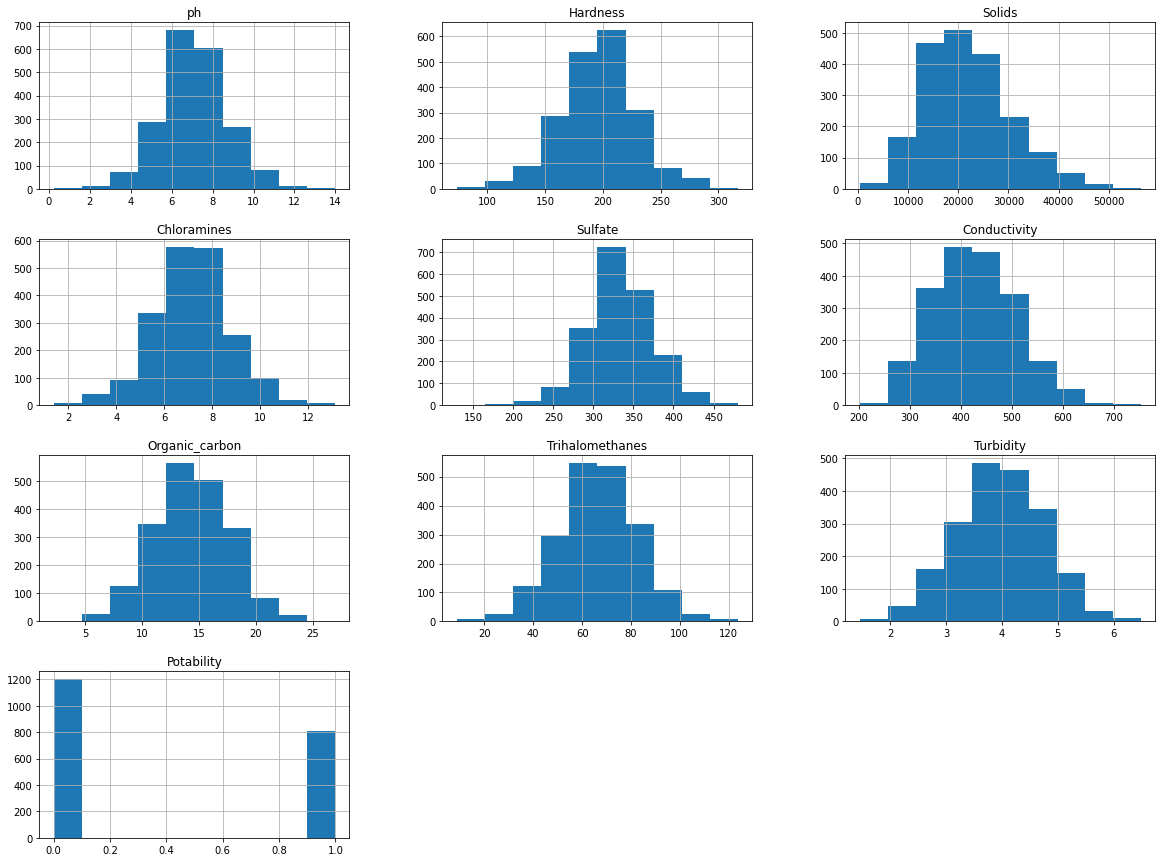

In [ ]:
df.hist(figsize=(20,15))

In [ ]:
df.Potability.value_counts()

0    1200
1     811
Name: Potability, dtype: int64

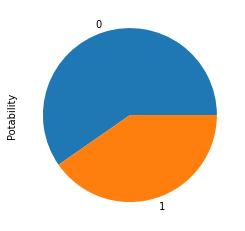

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df.Potability.value_counts().plot(kind ='pie')

In [ ]:
zero = df[df['Potability']==0]
one = df[df['Potability']==1]

from sklearn.utils import resample

df_upsampled = resample(one, replace=True, n_samples=1200)

df = pd.concat([zero, df_upsampled])

from sklearn.utils import shuffle

df = shuffle(df)

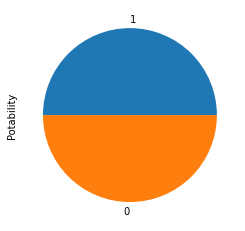

In [ ]:
df.Potability.value_counts().plot(kind ='pie')

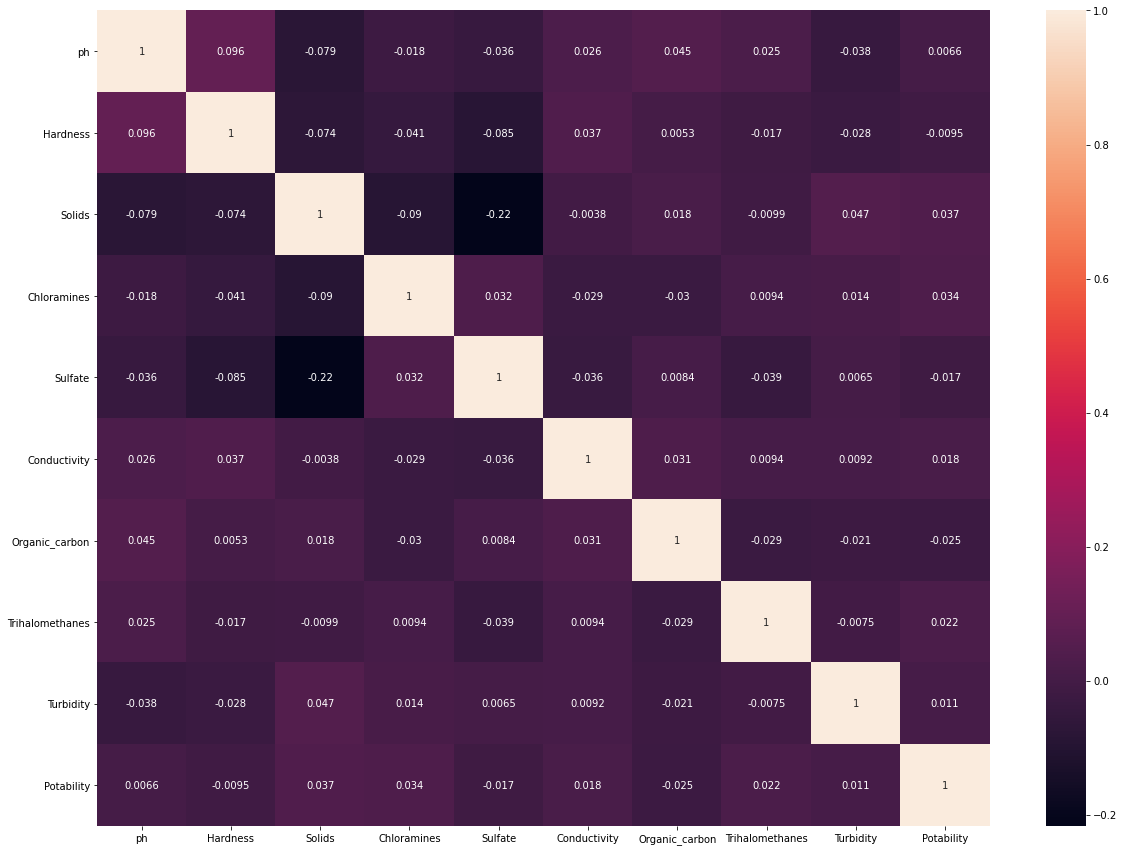

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True)

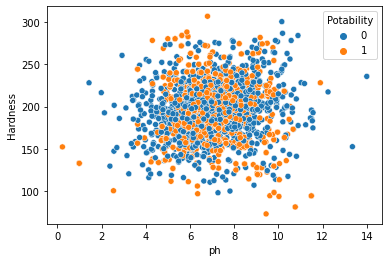

In [ ]:
sns.scatterplot(x=df['ph'],y=df['Hardness'],hue=df.Potability,data=df  )

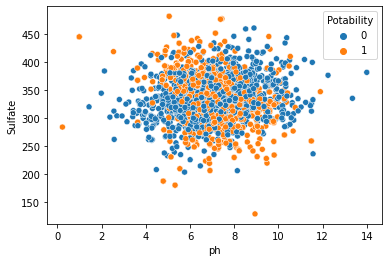

In [ ]:
sns.scatterplot(x=df['ph'],y=df['Sulfate'],hue=df.Potability,data=df)

In [ ]:
df.corr().abs()['Potability'].sort_values(ascending=False)

Potability         1.000000
Solids             0.037034
Chloramines        0.034453
Organic_carbon     0.024874
Trihalomethanes    0.022415
Conductivity       0.018049
Sulfate            0.016677
Turbidity          0.010998
Hardness           0.009495
ph                 0.006642
Name: Potability, dtype: float64

In [ ]:
X = df.drop(['Potability'],axis=1)
y = df['Potability']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
feature = X.columns
X[feature] = scaler.fit_transform(X[feature])

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.1)

In [ ]:
#Hyper Parameter Tuning
lr = LogisticRegression(random_state=42)
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
knn = KNeighborsClassifier()
ada = AdaBoostClassifier()
xgb = XGBClassifier(eval_metric='logloss', use_label_encoder=False)

#param tuning for knn
param_knn = {'n_neighbors' : np.arange(1,50)}
grid_knn = GridSearchCV(knn, param_grid = param_knn, cv = 5)

#param tuning for dt
param_dt = {'criterion':['gini','entropy'], 'max_depth': np.arange(1,50),'min_samples_leaf':[1,2,3,4,5,10,20,30,40,80,100]}
grid_dt = GridSearchCV(dt, param_grid= param_dt, cv = 5)

#param tuning for rf
param_rf = {'n_estimators':[100,200, 350, 500], 'min_samples_leaf': [2,10,30]}
grid_rf = GridSearchCV(rf, param_grid=param_rf, cv = 5)

#param tuning for ada 
param_ada = {'n_estimators':[50,100,250,400,500,600], 'learning_rate':[0.2,0.5,0.8,1]}
grid_ada = GridSearchCV(ada, param_grid=param_ada, cv = 5)

#param tuning for xgb
param_xgb = {'n_estimators':[50,100,250,400,600,800,1000], 'learning_rate':[0.2,0.5,0.8,1]}
rs_xgb = RandomizedSearchCV(xgb, param_distributions = param_xgb, cv= 5)


In [ ]:
grid_knn.fit(X_train,y_train)
grid_dt.fit(X_train,y_train)
grid_rf.fit(X_train,y_train)
grid_ada.fit(X_train,y_train)
rs_xgb.fit(X_train,y_train)

print("Best params for knn : " , grid_knn.best_params_)
print("Best params for dt : " , grid_dt.best_params_)
print("Best params for rf : " , grid_rf.best_params_)
print("Best params for ada : " , grid_ada.best_params_)
print("Best params for xgb : " , rs_xgb.best_params_)

Best params for knn :  {'n_neighbors': 1}
Best params for dt :  {'criterion': 'gini', 'max_depth': 40, 'min_samples_leaf': 1}
Best params for rf :  {'min_samples_leaf': 2, 'n_estimators': 500}
Best params for ada :  {'learning_rate': 1, 'n_estimators': 600}
Best params for xgb :  {'n_estimators': 600, 'learning_rate': 0.5}


In [ ]:
lr = LogisticRegression(random_state=42)
knn = KNeighborsClassifier(n_neighbors=1)
dt = DecisionTreeClassifier(criterion='gini', max_depth=40,min_samples_leaf=1)
rf = RandomForestClassifier(min_samples_leaf=2,n_estimators=500,random_state=42)
ada = AdaBoostClassifier(learning_rate=1,n_estimators=600)
xgb = XGBClassifier(n_estimators=600,learning_rate=0.5)

bagging = BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=34,min_samples_leaf=1,random_state=42),n_estimators=100,random_state=42)
bagging.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=34,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=42,
    

In [ ]:
classifiers = [('Logistic Regression', lr), ('K Nearest Neighbours', knn), ('Decision Tree', dt), ('Random Forest', rf),('AdaBoost', ada),('Bagging Classifier',bagging),('XGBoost',xgb)]


In [ ]:
from sklearn.metrics import accuracy_score

for classifier_name, classifier in classifiers:

  #fit the model
  classifier.fit(X_train,y_train)

  #test model
  y_pred = classifier.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)

  #evaluate the accuracy model
  print('{:s} : {:.2f}'.format(classifier_name,accuracy))

Logistic Regression : 0.54
K Nearest Neighbours : 0.83
Decision Tree : 0.82
Random Forest : 0.85
AdaBoost : 0.66
Bagging Classifier : 0.84
XGBoost : 0.79


In [ ]:
from sklearn.metrics import classification_report

y_pred_rf = rf.predict(X_test)
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       116
           1       0.86      0.85      0.86       124

    accuracy                           0.85       240
   macro avg       0.85      0.85      0.85       240
weighted avg       0.85      0.85      0.85       240



Text(0.5, 15.0, 'Predicted label')

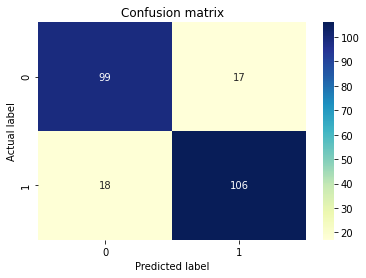

In [ ]:
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt 
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_rf)
p = sns.heatmap(pd.DataFrame(cnf_matrix),annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')